In [33]:
import pandas as pd
import numpy as np
import re
import sklearn
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
#import warnings
#warnings.filterwarnings('ignore')
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ExpSineSquared, WhiteKernel
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

In [6]:
df = pd.read_pickle('working_df.pkl')
df_slice = pd.read_pickle('slice.pkl')

In [8]:
df_slice

,screen_alt_mid_ft,lat,long,nitrate_um,chloride_um,B_um,long_dec,lat_dec
31,45.66,413818.38,703240.46,63,166,1.5,70.544572,41.638439
766,44.43,413817.19,703236.82,210,84,1.5,70.543561,41.638108
1032,44.70,413819.97,703243.37,59,109,1.1,70.545381,41.638881
1045,46.60,413820.98,703243.65,158,125,1.7,70.545458,41.639161
1046,46.86,413820.51,703243.57,23,110,0.6,70.545436,41.639031
1047,44.86,413820.51,703243.57,51,102,0.8,70.545436,41.639031
1096,46.39,413819.52,703238.91,118,111,1.5,70.544142,41.638756
1097,44.84,413819.52,703238.91,120,84,1.8,70.544142,41.638756
1113,46.25,413819.65,703236.08,114,174,2.0,70.543356,41.638792
1114,43.25,413819.65,703236.08,130,205,1.6,70.543356,41.638792


In [21]:
df_slice['lat_dec'].min()

41.638108333333335

In [22]:
df_slice['lat_dec'].max()

41.639897222222224

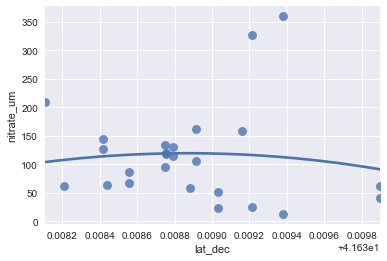

In [41]:
#g = sns.jointplot(df_slice['lat_dec'], df_slice['nitrate_um'])
#g.set(ylim=(df_slice[lat_dec].min(), df_slice[lat_dec].max()))
f, ax = plt.subplots()
ax.set(xlim=(df_slice['lat_dec'].min(), df_slice['lat_dec'].max()))
ax = sns.regplot(x="lat_dec", y="nitrate_um", data=df_slice, scatter_kws={"s": 80},order=2, ci=None)

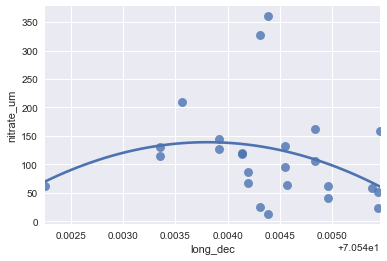

In [23]:
f, ax = plt.subplots()
ax.set(xlim=(df_slice['long_dec'].min(), df_slice['long_dec'].max()))
ax = sns.regplot(x="long_dec", y="nitrate_um", data=df_slice, scatter_kws={"s": 80},order=2, ci=None)

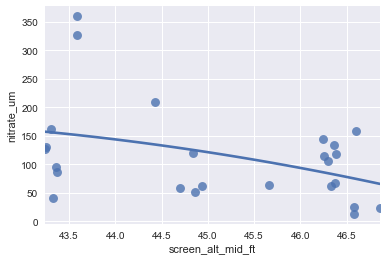

In [24]:
f, ax = plt.subplots()
ax.set(xlim=(df_slice['screen_alt_mid_ft'].min(), df_slice['screen_alt_mid_ft'].max()))
ax = sns.regplot(x="screen_alt_mid_ft", y="nitrate_um", data=df_slice, scatter_kws={"s": 80},order=2, ci=None)

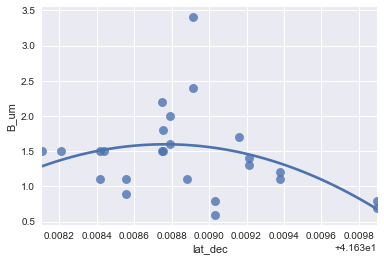

In [51]:
f, ax = plt.subplots()
ax.set(xlim=(df_slice['lat_dec'].min(), df_slice['lat_dec'].max()))
ax = sns.regplot(x="lat_dec", y="B_um", data=df_slice, scatter_kws={"s": 80},order=2, ci=None)

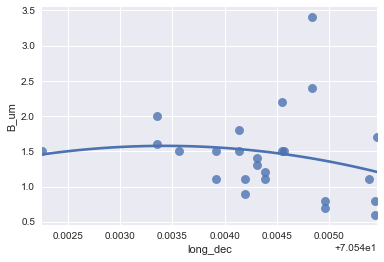

In [50]:
f, ax = plt.subplots()
ax.set(xlim=(df_slice['long_dec'].min(), df_slice['long_dec'].max()))
ax = sns.regplot(x="long_dec", y="B_um", data=df_slice, scatter_kws={"s": 80},order=2, ci=None)

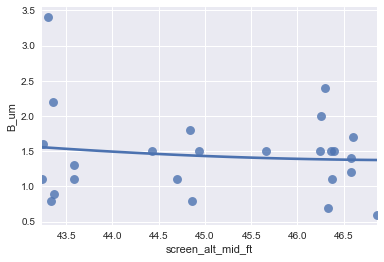

In [49]:
f, ax = plt.subplots()
ax.set(xlim=(df_slice['screen_alt_mid_ft'].min(), df_slice['screen_alt_mid_ft'].max()))
ax = sns.regplot(x="screen_alt_mid_ft", y="B_um", data=df_slice, scatter_kws={"s": 80},order=2, ci=None)

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

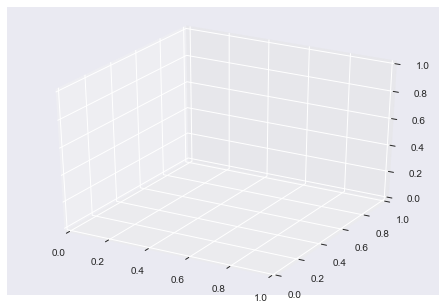

In [35]:
fig = plt.figure() #doesn't work yet
ax = Axes3D(fig)
X = df_slice['lat_dec']
Y = df_slice['long_dec']
Z = df_slice['nitrate_um']
xi = np.linspace(X.min(),X.max(),(len(Z)/3))
yi = np.linspace(Y.min(),Y.max(),(len(Z)/3))
zi = griddata((X, Y), Z, (xi[None,:], yi[:,None]), method='nearest')

xig, yig = np.meshgrid(xi, yi)

surf = ax.plot_surface(xig, yig, zi, cmap='gist_earth')
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title('test')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Nitrate (um)')
#ax.set_zlim3d(0,8000)